In [ ]:
pip install gym
pip install pymdptoolbox

In [2]:
#Packages Used
import gym
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from gym.envs.toy_text.frozen_lake import generate_random_map
from mdptoolbox.mdp import PolicyIteration, ValueIteration, QLearning, PolicyIterationModified
from mdptoolbox.example import forest

In [3]:
flsz = 6
flrmap = generate_random_map(size=flsz, p=0.85)
flenv = gym.make("FrozenLake-v0", desc=flrmap, is_slippery = True)
flenv.reset()
flenv.render()

flstates = flenv.observation_space.n
flactions = flenv.action_space.n

fltrans = np.zeros((flactions, flstates, flstates))
flrewards = np.zeros((flstates, flactions))

for state in flenv.env.P:
    for action in flenv.env.P[state]:
        for opt in flenv.env.P[state][action]:
            fltrans[action][state][opt[1]] += opt[0]
            flrewards[state][action] += opt[2]


SFFFFH
FFFFFH
FFFFFF
FHFHFF
FFFFHF
HFHFFG


In [4]:
fmsz = 500  
fmtrans, fmrewards = forest(S=fmsz)

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

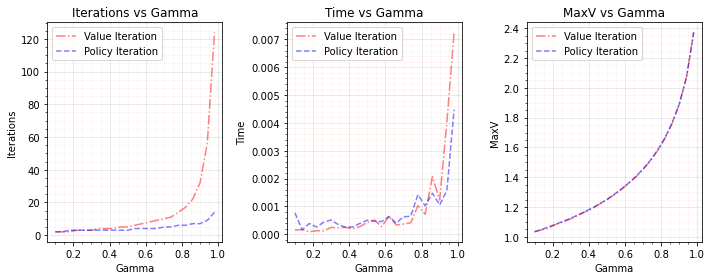

In [5]:
vistats = []
pistats = []
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4));

gammas = np.arange(0.1, 0.99, 0.04)

for gamma in gammas:
    vi = ValueIteration(fltrans, flrewards, gamma)
    vi.run()
    time = vi.time
    maxV = np.amax(vi.V)    
    iters = vi.iter
    vistats.append(['VI', flsz, gamma, time, maxV, iters])

    pi = PolicyIterationModified(fltrans, flrewards, gamma)
    pi.run()
    time = pi.time
    maxV = np.amax(pi.V)    
    iters = pi.iter
    pistats.append(['PI', flsz, gamma, time, maxV, iters])

dfvi = pd.DataFrame(vistats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV',  'Iterations'])
dfpi = pd.DataFrame(pistats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV',  'Iterations'])

sns.lineplot(dfvi['Gamma'], dfvi['Iterations'], linestyle='-.', label = "Value Iteration", ax=axs[0], alpha=0.5, color='red')
sns.lineplot(dfpi['Gamma'], dfpi['Iterations'], linestyle='--', label = "Policy Iteration", ax=axs[0], alpha=0.5, color='blue')
axs[0].set_title('Iterations vs Gamma')

sns.lineplot(dfvi['Gamma'], dfvi['Time'], linestyle='-.', label = "Value Iteration", ax=axs[1], alpha=0.5, color='red')
sns.lineplot(dfpi['Gamma'], dfpi['Time'], linestyle='--', label = "Policy Iteration", ax=axs[1], alpha=0.5, color='blue')
axs[1].set_title('Time vs Gamma')

sns.lineplot(dfvi['Gamma'], dfvi['MaxV'], linestyle='-.', label = "Value Iteration", ax=axs[2], alpha=0.5, color='red')
sns.lineplot(dfpi['Gamma'], dfpi['MaxV'], linestyle='--', label = "Policy Iteration", ax=axs[2], alpha=0.5, color='blue')
axs[2].set_title('MaxV vs Gamma')

for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()
    ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
    ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
fig.tight_layout()


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

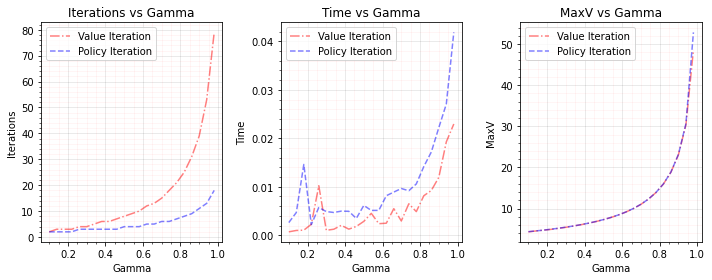

In [6]:
vistats = []
pistats = []
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4));

gammas = np.arange(0.1, 0.99, 0.04)

for gamma in gammas:
    vi = ValueIteration(fmtrans, fmrewards, gamma)
    vi.run()
    time = vi.time
    maxV = np.amax(vi.V)    
    iters = vi.iter
    vistats.append(['VI', fmsz, gamma, time, maxV, iters])


    pi = PolicyIterationModified(fmtrans, fmrewards, gamma)
    pi.run()
    time = pi.time
    maxV = np.amax(pi.V)    
    iters = pi.iter
    pistats.append(['PI', fmsz, gamma, time, maxV, iters])

dfvi = pd.DataFrame(vistats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV',  'Iterations'])
dfpi = pd.DataFrame(pistats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV',  'Iterations'])

sns.lineplot(dfvi['Gamma'], dfvi['Iterations'], linestyle='-.', label = "Value Iteration", ax=axs[0], alpha=0.5, color='red')
sns.lineplot(dfpi['Gamma'], dfpi['Iterations'], linestyle='--', label = "Policy Iteration", ax=axs[0], alpha=0.5, color='blue')
axs[0].set_title('Iterations vs Gamma')

sns.lineplot(dfvi['Gamma'], dfvi['Time'], linestyle='-.', label = "Value Iteration", ax=axs[1], alpha=0.5, color='red')
sns.lineplot(dfpi['Gamma'], dfpi['Time'], linestyle='--', label = "Policy Iteration", ax=axs[1], alpha=0.5, color='blue')
axs[1].set_title('Time vs Gamma')

sns.lineplot(dfvi['Gamma'], dfvi['MaxV'], linestyle='-.', label = "Value Iteration", ax=axs[2], alpha=0.5, color='red')
sns.lineplot(dfpi['Gamma'], dfpi['MaxV'], linestyle='--', label = "Policy Iteration", ax=axs[2], alpha=0.5, color='blue')
axs[2].set_title('MaxV vs Gamma')


for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()
    ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
    ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
fig.tight_layout()

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

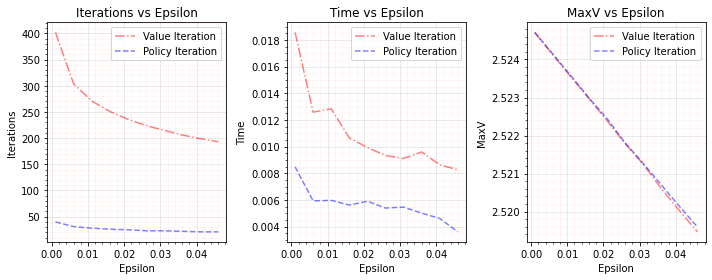

In [7]:
vistats = []
pistats = []
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4));

gamma = 0.99
epsilons = np.arange(0.001,0.05, 0.005)

for epsilon in epsilons:
    vi = ValueIteration(fltrans, flrewards, gamma, epsilon=epsilon)
    vi.run()
    time = vi.time
    maxV = np.amax(vi.V)    
    iters = vi.iter
    vistats.append(['VI', flsz, epsilon, time, maxV, iters])


    pi = PolicyIterationModified(fltrans, flrewards, gamma, epsilon=epsilon)
    pi.run()
    time = pi.time
    maxV = np.amax(pi.V)    
    iters = pi.iter
    pistats.append(['PI', flsz, epsilon, time, maxV, iters])

dfvi = pd.DataFrame(vistats, columns=['Type', 'Size', 'Epsilon',  'Time', 'MaxV', 'Iterations'])
dfpi = pd.DataFrame(pistats, columns=['Type', 'Size', 'Epsilon',  'Time', 'MaxV', 'Iterations'])

sns.lineplot(dfvi['Epsilon'], dfvi['Iterations'], linestyle='-.', label = "Value Iteration", ax=axs[0], alpha=0.5, color='red')
sns.lineplot(dfpi['Epsilon'], dfpi['Iterations'], linestyle='--', label = "Policy Iteration", ax=axs[0], alpha=0.5, color='blue')
axs[0].set_title('Iterations vs Epsilon')

sns.lineplot(dfvi['Epsilon'], dfvi['Time'], linestyle='-.', label = "Value Iteration", ax=axs[1], alpha=0.5, color='red')
sns.lineplot(dfpi['Epsilon'], dfpi['Time'], linestyle='--', label = "Policy Iteration", ax=axs[1], alpha=0.5, color='blue')
axs[1].set_title('Time vs Epsilon')

sns.lineplot(dfvi['Epsilon'], dfvi['MaxV'], linestyle='-.', label = "Value Iteration", ax=axs[2], alpha=0.5, color='red')
sns.lineplot(dfpi['Epsilon'], dfpi['MaxV'], linestyle='--', label = "Policy Iteration", ax=axs[2], alpha=0.5, color='blue')
axs[2].set_title('MaxV vs Epsilon')

for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()
    ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
    ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
fig.tight_layout()

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

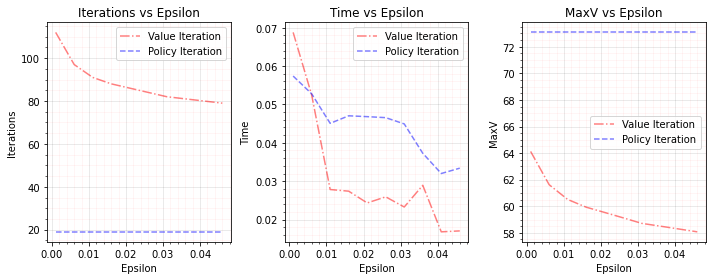

In [8]:
vistats = []
pistats = []
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4));

gamma = 0.99
epsilons = np.arange(0.001,0.05, 0.005)

for epsilon in epsilons:
    vi = ValueIteration(fmtrans, fmrewards, gamma, epsilon=epsilon)
    vi.run()
    time = vi.time
    maxV = np.amax(vi.V)    
    iters = vi.iter
    vistats.append(['VI', fmsz, epsilon, time, maxV, iters])


    pi = PolicyIterationModified(fmtrans, fmrewards, gamma, epsilon=epsilon)
    pi.run()
    time = pi.time
    maxV = np.amax(pi.V)    
    iters = pi.iter
    pistats.append(['PI', fmsz, epsilon, time, maxV, iters])

dfvi = pd.DataFrame(vistats, columns=['Type', 'Size', 'Epsilon',  'Time', 'MaxV', 'Iterations'])
dfpi = pd.DataFrame(pistats, columns=['Type', 'Size', 'Epsilon',  'Time', 'MaxV', 'Iterations'])

sns.lineplot(dfvi['Epsilon'], dfvi['Iterations'], linestyle='-.', label = "Value Iteration", ax=axs[0], alpha=0.5, color='red')
sns.lineplot(dfpi['Epsilon'], dfpi['Iterations'], linestyle='--', label = "Policy Iteration", ax=axs[0], alpha=0.5, color='blue')
axs[0].set_title('Iterations vs Epsilon')

sns.lineplot(dfvi['Epsilon'], dfvi['Time'], linestyle='-.', label = "Value Iteration", ax=axs[1], alpha=0.5, color='red')
sns.lineplot(dfpi['Epsilon'], dfpi['Time'], linestyle='--', label = "Policy Iteration", ax=axs[1], alpha=0.5, color='blue')
axs[1].set_title('Time vs Epsilon')

sns.lineplot(dfvi['Epsilon'], dfvi['MaxV'], linestyle='-.', label = "Value Iteration", ax=axs[2], alpha=0.5, color='red')
sns.lineplot(dfpi['Epsilon'], dfpi['MaxV'], linestyle='--', label = "Policy Iteration", ax=axs[2], alpha=0.5, color='blue')
axs[2].set_title('MaxV vs Epsilon')

for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()
    ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
    ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
fig.tight_layout()

<AxesSubplot:title={'center':'Policy Iteration: Optimal Policy'}>

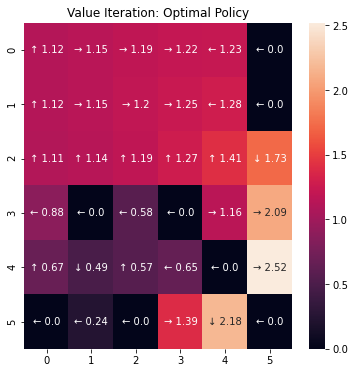

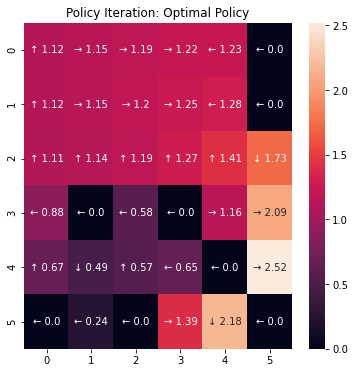

In [9]:
gamma = 0.99
epsilon  = 0.01

# Plot optimal policy for VI
vi = ValueIteration(fltrans, flrewards, gamma, epsilon=epsilon)
vi.run()

policyarr = np.array(list(vi.policy)).reshape(flsz, flsz).astype(str)

valuearr = np.round(np.array(list(vi.V)).reshape(flsz, flsz), 2)
# np.char.replace(policyarr, '0', '←')
# np.char.replace(policyarr, '1', '↓')
# np.char.replace(policyarr, '2', '→')
# np.char.replace(policyarr, '3', '↑')
policyarr[policyarr=='0'] = '←'
policyarr[policyarr=='1'] = '↓'
policyarr[policyarr=='2'] = '→'
policyarr[policyarr=='3'] = '↑'


policyviz = (np.asarray([a+" "+str(v) for a, v in zip(policyarr.flatten(), valuearr.flatten())])).reshape(flsz,flsz)
plt.figure(figsize=(flsz,flsz))
plt.title("Value Iteration: Optimal Policy")
sns.heatmap(valuearr, annot=policyviz, fmt="")

# Plot optimal policy for PI
pi = PolicyIterationModified(fltrans, flrewards, gamma, epsilon=epsilon)
pi.run()

policyarr = np.array(list(pi.policy)).reshape(flsz, flsz).astype(str)

valuearr = np.round(np.array(list(pi.V)).reshape(flsz, flsz), 2)
# np.char.replace(policyarr, '0', '←')
# np.char.replace(policyarr, '1', '↓')
# np.char.replace(policyarr, '2', '→')
# np.char.replace(policyarr, '3', '↑')
policyarr[policyarr=='0'] = '←'
policyarr[policyarr=='1'] = '↓'
policyarr[policyarr=='2'] = '→'
policyarr[policyarr=='3'] = '↑'


policyviz = (np.asarray([a+" "+str(v) for a, v in zip(policyarr.flatten(), valuearr.flatten())])).reshape(flsz,flsz)
plt.figure(figsize=(flsz,flsz))
plt.title("Policy Iteration: Optimal Policy")
sns.heatmap(valuearr, annot=policyviz, fmt="")

# # Plot optimal policy for QL
# ql = QLearning(trans, rewards, gamma, n_iter=1000000)
# ql.run()

# policyarr = np.array(list(ql.policy)).reshape(sz, sz).astype(str)

# valuearr = np.round(np.array(list(ql.V)).reshape(sz, sz), 2)
# # np.char.replace(policyarr, '0', '←')
# # np.char.replace(policyarr, '1', '↓')
# # np.char.replace(policyarr, '2', '→')
# # np.char.replace(policyarr, '3', '↑')
# policyarr[policyarr=='0'] = '←'
# policyarr[policyarr=='1'] = '↓'
# policyarr[policyarr=='2'] = '→'
# policyarr[policyarr=='3'] = '↑'


# policyviz = (np.asarray([a+" "+str(v) for a, v in zip(policyarr.flatten(), valuearr.flatten())])).reshape(sz,sz)
# plt.figure(figsize=(sz,sz))
# plt.title("Q Learning: Optimal Policy - Size: {}x{}".format(sz,sz))
# sns.heatmap(valuearr, annot=policyviz, fmt="")

In [10]:
gamma =0.999
epsilon  = 0.0000001

# Plot optimal policy for VI
vi = ValueIteration(fmtrans, fmrewards, gamma, epsilon=epsilon)
vi.run()
policyarr = np.array(list(vi.policy)).reshape(fmsz).astype(str)
valuearr = np.round(np.array(list(vi.V)).reshape(fmsz), 2)

policyarr[policyarr=='0'] = 'W'
policyarr[policyarr=='1'] = 'C'
policyviz = (np.asarray([a+" "+str(v) for a, v in zip(policyarr.flatten(), valuearr.flatten())])).reshape(fmsz)

print("Value Iteration: Optimal Policy")
line=""
for val in policyviz:
    line += (" {} >".format(val))
print(line)

# Plot optimal policy for PI
pi = PolicyIterationModified(fmtrans, fmrewards, gamma, epsilon=epsilon)
pi.run()
policyarr = np.array(list(pi.policy)).reshape(fmsz).astype(str)
valuearr = np.round(np.array(list(pi.V)).reshape(fmsz), 2)
policyarr[policyarr=='0'] = 'W'
policyarr[policyarr=='1'] = 'C'
policyviz = (np.asarray([a+" "+str(v) for a, v in zip(policyarr.flatten(), valuearr.flatten())])).reshape(fmsz)

print("")
print("Policy Iteration: Optimal Policy")
line=""
for val in policyviz:
    line += (" {} >".format(val))
print(line)

# # Plot optimal policy for QL
# ql = QLearning(trans, rewards, gamma, n_iter=1000000)
# ql.run()
# print(ql.policy)
# policyarr = np.array(list(ql.policy)).reshape(sz).astype(str)

# valuearr = np.round(np.array(list(ql.V)).reshape(sz), 2)
# policyarr[policyarr=='0'] = 'W'
# policyarr[policyarr=='1'] = 'C'
# policyviz = (np.asarray([a+" "+str(v) for a, v in zip(policyarr.flatten(), valuearr.flatten())])).reshape(fmsz)

# print("")
# print("Q Learning: Optimal Policy")
# line=""
# for val in policyviz:
#     line += (" {} >".format(val))
# print(line)

Value Iteration: Optimal Policy
 W 97.12 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65 > C 97.65

In [11]:
vistats = []
pistats = []

gridsizes = range(4, 50, 1)
gamma = 0.99
for sz in gridsizes:
    rmap = generate_random_map(size=sz, p=0.85)
    env = gym.make("FrozenLake-v0", desc=rmap, is_slippery = True)
    env.reset()

    states = env.observation_space.n
    actions = env.action_space.n

    trans = np.zeros((actions, states, states))
    rewards = np.zeros((states, actions))

    for state in env.env.P:
        for action in env.env.P[state]:
            for opt in env.env.P[state][action]:
                trans[action][state][opt[1]] += opt[0]
                rewards[state][action] += opt[2]

                
    vi = ValueIteration(trans, rewards, gamma)
    vi.run()
    time = vi.time
    maxV = np.amax(vi.V)    
    iters = vi.iter
    vistats.append(['VI', sz, gamma, time, maxV, iters])        

    pi = PolicyIterationModified(trans, rewards, gamma)
    pi.run()
    time = pi.time
    maxV = np.amax(pi.V)    
    iters = pi.iter
    pistats.append(['PI', sz, gamma, time, maxV, iters])
    
#     ql = QLearning(trans, rewards, gamma, n_iter=10000)
#     ql.run()
#     qldf = ql.run_stats 
#     time = ql.time
#     maxV = np.amax(ql.V)    
#     iters = 0
#     qlstats.append(['QL', sz, gamma,  time, maxV, iters])

In [12]:
vistatsdf = pd.DataFrame(vistats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV', 'Iterations'])
pistatsdf = pd.DataFrame(pistats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV', 'Iterations'])
# qlstatsdf = pd.DataFrame(qlstats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV', 'Iterations'])

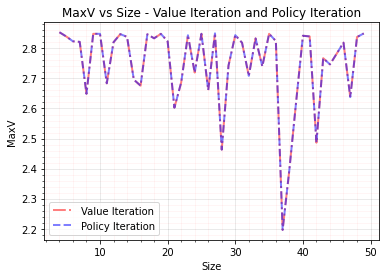

In [13]:
fig, ax = plt.subplots()
ax.plot(vistatsdf['Size'], vistatsdf['MaxV'], color='red', label="Value Iteration", linewidth=2.0, linestyle='-.', alpha=0.5)
ax.plot(pistatsdf['Size'], pistatsdf['MaxV'], color='blue', label="Policy Iteration", linewidth=2.0, linestyle='--', alpha=0.5)
# ax.plot(qlstatsdf['Size'], qlstatsdf['MaxV'], color='green', label="Q Learning", linewidth=2.0, linestyle='--', alpha=0.5)

# ax.set_ylim([0, 5])
ax.set_title('MaxV vs Size - Value Iteration and Policy Iteration')
ax.legend(loc='best')
plt.xlabel('Size')
plt.ylabel('MaxV')
plt.minorticks_on()
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
plt.show()

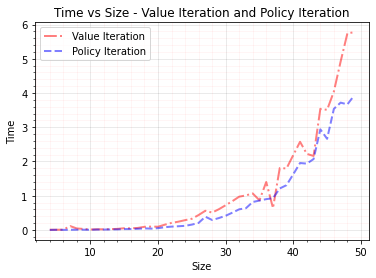

In [14]:
fig, ax = plt.subplots()
ax.plot(vistatsdf['Size'], vistatsdf['Time'], color='red', label="Value Iteration", linewidth=2.0, linestyle='-.', alpha=0.5)
ax.plot(pistatsdf['Size'], pistatsdf['Time'], color='blue', label="Policy Iteration", linewidth=2.0, linestyle='--', alpha=0.5)
# ax.plot(qlstatsdf['Size'], qlstatsdf['Time'], color='green', label="Q Learning", linewidth=2.0, linestyle='--', alpha=0.5)

# ax.set_ylim([0, 5])
ax.set_title('Time vs Size - Value Iteration and Policy Iteration')
ax.legend(loc='best')
plt.xlabel('Size')
plt.ylabel('Time')
plt.minorticks_on()
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
plt.show()

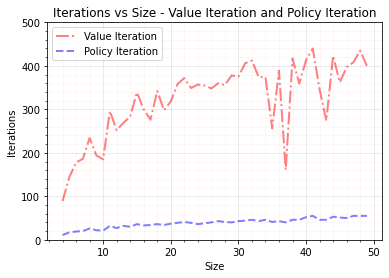

In [15]:
fig, ax = plt.subplots()
ax.plot(vistatsdf['Size'], vistatsdf['Iterations'], color='red', label="Value Iteration", linewidth=2.0, linestyle='-.', alpha=0.5)
ax.plot(pistatsdf['Size'], pistatsdf['Iterations'], color='blue', label="Policy Iteration", linewidth=2.0, linestyle='--', alpha=0.5)
# ax.plot(qlstatsdf['Size'], qlstatsdf['Iterations'], color='green', label="Q Learning", linewidth=2.0, linestyle='--', alpha=0.5)

ax.set_ylim([0, 500])
ax.set_title('Iterations vs Size - Value Iteration and Policy Iteration')
ax.legend(loc='best')
plt.xlabel('Size')
plt.ylabel('Iterations')
plt.minorticks_on()
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
plt.show()

In [16]:
vistats = []
pistats = []

sizes = range(4, 500, 1)
gamma = 0.99
for sz in sizes:
    trans, rewards = forest(S=sz)
               
    vi = ValueIteration(trans, rewards, gamma)
    vi.run()
    time = vi.time
    maxV = np.amax(vi.V)    
    iters = vi.iter
    vistats.append(['VI', sz, gamma, time, maxV, iters])        

    pi = PolicyIterationModified(trans, rewards, gamma)
    pi.run()
    time = pi.time
    maxV = np.amax(pi.V)    
    iters = pi.iter
    pistats.append(['PI', sz, gamma, time, maxV, iters])
    
#     ql = QLearning(trans, rewards, gamma, n_iter=10000)
#     ql.run()
#     qldf = ql.run_stats 
#     time = ql.time
#     maxV = np.amax(ql.V)    
#     iters = 0
#     qlstats.append(['QL', sz, gamma,  time, maxV, iters])

In [17]:
vistatsdf = pd.DataFrame(vistats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV', 'Iterations'])
pistatsdf = pd.DataFrame(pistats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV', 'Iterations'])
# qlstatsdf = pd.DataFrame(qlstats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV', 'Iterations'])

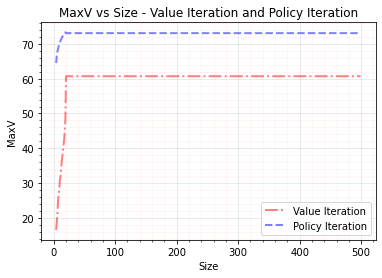

In [18]:
fig, ax = plt.subplots()
ax.plot(vistatsdf['Size'], vistatsdf['MaxV'], color='red', label="Value Iteration", linewidth=2.0, linestyle='-.', alpha=0.5)
ax.plot(pistatsdf['Size'], pistatsdf['MaxV'], color='blue', label="Policy Iteration", linewidth=2.0, linestyle='--', alpha=0.5)
# ax.plot(qlstatsdf['Size'], qlstatsdf['MaxV'], color='green', label="Q Learning", linewidth=2.0, linestyle='--', alpha=0.5)

# ax.set_ylim([0, 5])
ax.set_title('MaxV vs Size - Value Iteration and Policy Iteration')
ax.legend(loc='best')
plt.xlabel('Size')
plt.ylabel('MaxV')
plt.minorticks_on()
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
plt.show()

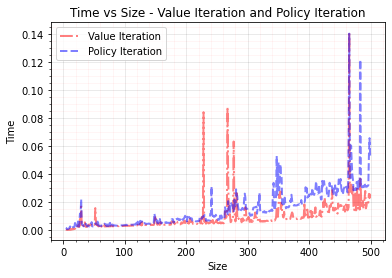

In [19]:
fig, ax = plt.subplots()
ax.plot(vistatsdf['Size'], vistatsdf['Time'], color='red', label="Value Iteration", linewidth=2.0, linestyle='-.', alpha=0.5)
ax.plot(pistatsdf['Size'], pistatsdf['Time'], color='blue', label="Policy Iteration", linewidth=2.0, linestyle='--', alpha=0.5)
# ax.plot(qlstatsdf['Size'], qlstatsdf['Time'], color='green', label="Q Learning", linewidth=2.0, linestyle='--', alpha=0.5)

# ax.set_ylim([0, 5])
ax.set_title('Time vs Size - Value Iteration and Policy Iteration')
ax.legend(loc='best')
plt.xlabel('Size')
plt.ylabel('Time')
plt.minorticks_on()
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
plt.show()

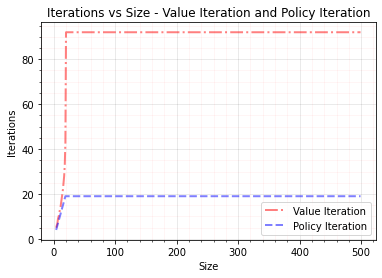

In [20]:
fig, ax = plt.subplots()
ax.plot(vistatsdf['Size'], vistatsdf['Iterations'], color='red', label="Value Iteration", linewidth=2.0, linestyle='-.', alpha=0.5)
ax.plot(pistatsdf['Size'], pistatsdf['Iterations'], color='blue', label="Policy Iteration", linewidth=2.0, linestyle='--', alpha=0.5)
#ax.plot(qlstatsdf['Size'], qlstatsdf['Iterations'], color='green', label="Q Learning", linewidth=2.0, linestyle='--', alpha=0.5)

# ax.set_ylim([0, 500])
ax.set_title('Iterations vs Size - Value Iteration and Policy Iteration')
ax.legend(loc='best')
plt.xlabel('Size')
plt.ylabel('Iterations')
plt.minorticks_on()
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
plt.show()

In [21]:
qlstats = []
gammas = np.arange(0.1, 0.99, 0.04)

for gamma in gammas:
    ql = QLearning(fltrans, flrewards, gamma, n_iter=100000)
    ql.run()
    time = ql.time
    maxV = np.amax(ql.V)    
    qlstats.append(['QL', flsz, gamma, time, maxV])

dfqlfl = pd.DataFrame(qlstats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV'])

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


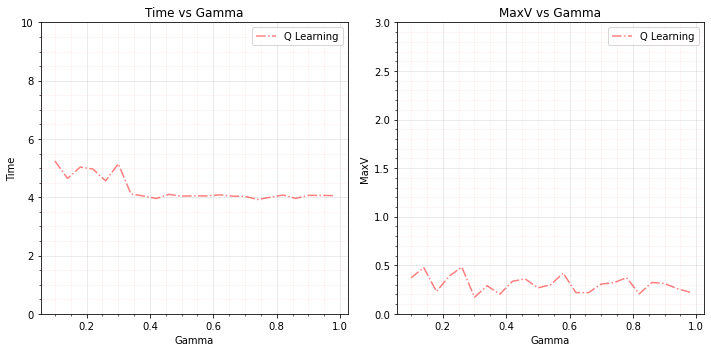

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5));
sns.lineplot(dfqlfl['Gamma'], dfqlfl['Time'], linestyle='-.', label = "Q Learning", ax=axs[0], alpha=0.5, color='red')
axs[0].set_title('Time vs Gamma')
axs[0].set_ylim([0,10])

sns.lineplot(dfqlfl['Gamma'], dfqlfl['MaxV'], linestyle='-.', label = "Q Learning", ax=axs[1], alpha=0.5, color='red')
axs[1].set_title('MaxV vs Gamma')
axs[1].set_ylim([0,3])

for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()
    ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
    ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
fig.tight_layout()

In [23]:
qlstats = []

gammas = np.arange(0.1, 0.99, 0.04)

for gamma in gammas:
    ql = QLearning(fmtrans, fmrewards, gamma, n_iter=100000)
    ql.run()
    time = ql.time
    maxV = np.amax(ql.V)    
    qlstats.append(['QL', fmsz, gamma, time, maxV])

dfqlfm = pd.DataFrame(qlstats, columns=['Type', 'Size', 'Gamma',  'Time', 'MaxV'])

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


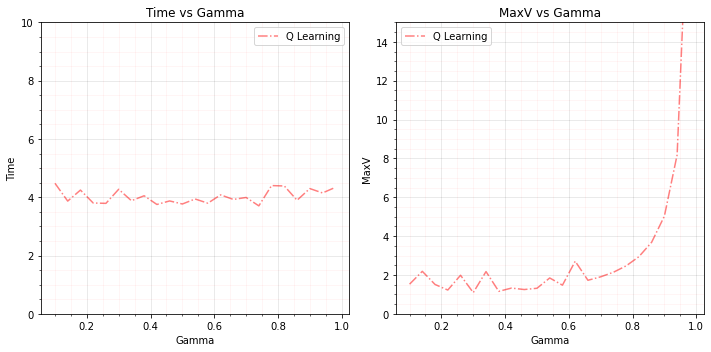

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5));

sns.lineplot(dfqlfm['Gamma'], dfqlfm['Time'], linestyle='-.', label = "Q Learning", ax=axs[0], alpha=0.5, color='red')
axs[0].set_title('Time vs Gamma')
axs[0].set_ylim([0,10])

sns.lineplot(dfqlfm['Gamma'], dfqlfm['MaxV'], linestyle='-.', label = "Q Learning", ax=axs[1], alpha=0.5, color='red')
axs[1].set_title('MaxV vs Gamma')
axs[1].set_ylim([0,15])

for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()
    ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
    ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
fig.tight_layout()

In [25]:
qlstats = []

gamma = 0.99
niters = [10000, 50000, 100000, 500000, 1000000] 

for niter in niters:
    ql = QLearning(fltrans, flrewards, gamma, n_iter=niter)
    ql.run()
    time = ql.time
    maxV = np.amax(ql.V)    
    qlstats.append(['QL', sz, niter, time, maxV])

dfqlfliter = pd.DataFrame(qlstats, columns=['Type', 'Size', 'NIter',  'Time', 'MaxV'])

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


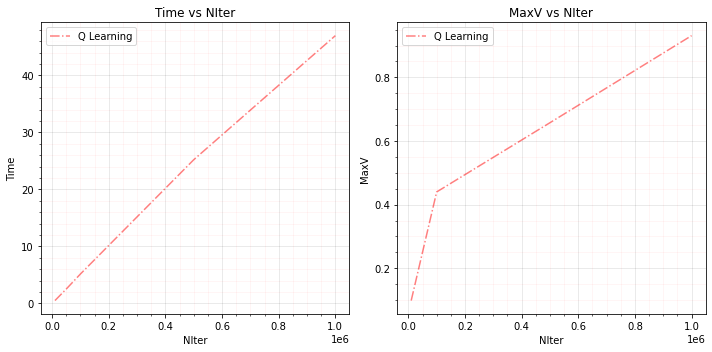

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5));
sns.lineplot(dfqlfliter['NIter'], dfqlfliter['Time'], linestyle='-.', label = "Q Learning", ax=axs[0], alpha=0.5, color='red')
axs[0].set_title('Time vs NIter')

sns.lineplot(dfqlfliter['NIter'], dfqlfliter['MaxV'], linestyle='-.', label = "Q Learning", ax=axs[1], alpha=0.5, color='red')
axs[1].set_title('MaxV vs NIter')

for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()
    ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
    ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
fig.tight_layout()

In [27]:
qlstats = []

gamma = 0.99
niters = [10000, 50000, 100000, 500000, 1000000] 

for niter in niters:
    ql = QLearning(fmtrans, fmrewards, gamma, n_iter=niter)
    ql.run()
    time = ql.time
    maxV = np.amax(ql.V)    
    qlstats.append(['QL', sz, niter, time, maxV])

dfqlfmiter = pd.DataFrame(qlstats, columns=['Type', 'Size', 'NIter',  'Time', 'MaxV'])

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


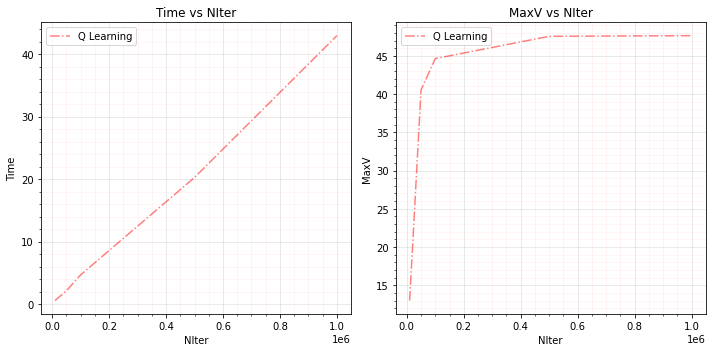

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5));
sns.lineplot(dfqlfmiter['NIter'], dfqlfmiter['Time'], linestyle='-.', label = "Q Learning", ax=axs[0], alpha=0.5, color='red')
axs[0].set_title('Time vs NIter')

sns.lineplot(dfqlfmiter['NIter'], dfqlfmiter['MaxV'], linestyle='-.', label = "Q Learning", ax=axs[1], alpha=0.5, color='red')
axs[1].set_title('MaxV vs NIter')

for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()
    ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
    ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
fig.tight_layout()

In [29]:
action_size = flenv.action_space.n
state_size = flenv.observation_space.n
qtable = np.zeros((state_size, action_size))

# define hyperparameters ----------
total_episodes = 15000        # Total episodes
learning_rate = 0.7           # Learning rate
max_steps = 100000             # Max steps per episode
gamma = 0.9                  # Discounting rate

# Exploration parameters
epsilon = 0.1                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.00001            # Minimum exploration probability
decay_rate = 0.005             # Exponential decay rate for exploration prob

# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = flenv.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)

        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = flenv.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = flenv.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        # Our new state is state
        state = new_state

        # If done (if we're dead) : finish episode
        if done == True:
            break

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 6.666666666666667e-05
[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.7 0. ]
 [0.  0.  0.  0. ]]


<AxesSubplot:title={'center':'Q Learning: Optimal Policy'}>

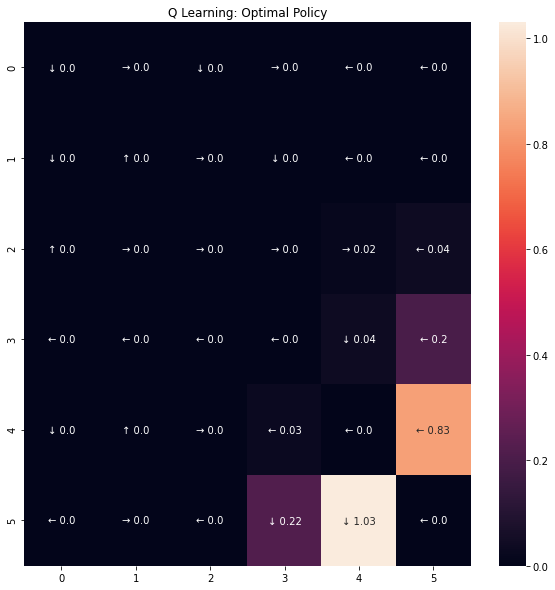

In [30]:
gamma = 0.80

# Plot optimal policy for QL
ql = QLearning(fltrans, flrewards, gamma, n_iter=1000000)
ql.run()

policyarr = np.array(list(ql.policy)).reshape(flsz, flsz).astype(str)

valuearr = np.round(np.array(list(ql.V)).reshape(flsz, flsz), 2)
# np.char.replace(policyarr, '0', '←')
# np.char.replace(policyarr, '1', '↓')
# np.char.replace(policyarr, '2', '→')
# np.char.replace(policyarr, '3', '↑')
policyarr[policyarr=='0'] = '←'
policyarr[policyarr=='1'] = '↓'
policyarr[policyarr=='2'] = '→'
policyarr[policyarr=='3'] = '↑'


policyviz = (np.asarray([a+" "+str(v) for a, v in zip(policyarr.flatten(), valuearr.flatten())])).reshape(flsz,flsz)
plt.figure(figsize=(10,10))
plt.title("Q Learning: Optimal Policy")
sns.heatmap(valuearr, annot=policyviz, fmt="")

In [31]:
gamma = 0.80

# Plot optimal policy for QL
ql = QLearning(fmtrans, fmrewards, gamma, n_iter=1000000)
ql.run()

policyarr = np.array(list(ql.policy)).reshape(fmsz).astype(str)
valuearr = np.round(np.array(list(ql.V)).reshape(fmsz), 2)
policyarr[policyarr=='0'] = 'W'
policyarr[policyarr=='1'] = 'C'
policyviz = (np.asarray([a+" "+str(v) for a, v in zip(policyarr.flatten(), valuearr.flatten())])).reshape(fmsz)

print("")
print("Q Learning: Optimal Policy")
line=""
for val in policyviz:
    line += (" {} >".format(val))
print(line)


Q Learning: Optimal Policy
 W 2.09 > C 2.67 > C 2.67 > C 2.16 > C 0.43 > W 0.06 > W 0.03 > W 0.17 > C 0.89 > W 0.0 > W 0.01 > W 0.03 > C 0.18 > W 0.02 > W 0.02 > W 0.05 > C 0.29 > W 0.03 > W 0.01 > C 0.05 > W 0.03 > W 0.03 > W 0.02 > W 0.04 > W 0.04 > W 0.03 > W 0.07 > W 0.03 > W 0.04 > W 0.05 > C 0.45 > W 0.02 > W 0.02 > C 0.26 > W 0.02 > C 0.24 > W 0.0 > W 0.02 > C 0.34 > C 0.09 > W 0.01 > W 0.01 > C 0.16 > C 0.17 > W 0.0 > W 0.02 > C 0.26 > C 0.08 > C 0.17 > W 0.0 > W 0.01 > C 0.18 > C 0.01 > W 0.0 > W 0.02 > W 0.02 > W 0.03 > C 0.15 > W 0.04 > C 0.25 > C 0.18 > W 0.01 > W 0.02 > C 0.27 > W 0.04 > W 0.02 > C 0.21 > W 0.02 > C 0.23 > C 0.05 > C 0.07 > W 0.03 > W 0.02 > C 0.11 > W 0.03 > W 0.01 > W 0.03 > C 0.17 > W 0.03 > C 0.26 > W 0.02 > C 0.08 > W 0.02 > C 0.2 > W 0.02 > C 0.18 > W 0.01 > C 0.21 > W 0.03 > W 0.01 > W 0.04 > C 0.2 > W 0.02 > C 0.23 > C 0.12 > W 0.01 > C 0.13 > C 0.07 > W 0.01 > C 0.15 > C 0.16 > W 0.01 > W 0.02 > W 0.02 > W 0.02 > C 0.25 > W 0.0 > W 0.02 > W 0.01 